In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs
cf.go_offline(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mutual Funds.csv')

In [ ]:
df.head()
df.shape

(1479, 15)

In [ ]:
# seeking information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FileName                       1479 non-null   object 
 1   Scheme_Name                    1479 non-null   object 
 2   Benchmark                      1479 non-null   object 
 3   Return_1_Year_(%)_Regular      1479 non-null   float64
 4   Return_1_Year_(%)_Benchmark    1479 non-null   float64
 5   Diff_1year                     1479 non-null   float64
 6   Return_3_Year_(%)_Regular      1253 non-null   float64
 7   Return_3_Year_(%)_Benchmark    1253 non-null   float64
 8   Diff_3year                     1253 non-null   float64
 9   Return_5_Year_(%)_Regular      1116 non-null   float64
 10  Return_5_Year_(%)_Benchmark    1116 non-null   float64
 11  Diff_5year                     1116 non-null   float64
 12  Return_Since_Launch_Regular    1479 non-null   f

In [ ]:
df.Scheme_Name.values

array(['360 ONE Quant Fund', 'Nippon India Quant Fund',
       'ICICI Prudential Quant Fund', ..., '360 ONE Quant Fund',
       'ICICI Prudential Quant Fund', 'Axis Quant Fund'], dtype=object)

### **Data Card: Mutual Funds Performance Dataset**  

#### **Overview**  
This dataset contains **1,479 entries** related to mutual fund schemes listed in India. It provides details on the **performance of these schemes** over different time periods (1 year, 3 years, 5 years, and since launch). The data includes both **regular returns** and **benchmark returns**, along with their differences.  

#### **Columns Description**  
1. **FileName** (*object*): Name of the source file.  
2. **Scheme_Name** (*object*): Name of the mutual fund scheme (e.g., *360 ONE Quant Fund, Nippon India Quant Fund*).  
3. **Benchmark** (*object*): The benchmark index used for comparison.  
4. **Return_1_Year_(%)_Regular** (*float64*): 1-year return percentage of the scheme.  
5. **Return_1_Year_(%)_Benchmark** (*float64*): 1-year return percentage of the benchmark.  
6. **Diff_1year** (*float64*): Difference between the scheme’s return and the benchmark return for 1 year.  
7. **Return_3_Year_(%)_Regular** (*float64*): 3-year return percentage of the scheme (available for **1,253** records).  
8. **Return_3_Year_(%)_Benchmark** (*float64*): 3-year return percentage of the benchmark (available for **1,253** records).  
9. **Diff_3year** (*float64*): Difference between the scheme’s return and the benchmark return for 3 years.  
10. **Return_5_Year_(%)_Regular** (*float64*): 5-year return percentage of the scheme (available for **1,116** records).  
11. **Return_5_Year_(%)_Benchmark** (*float64*): 5-year return percentage of the benchmark (available for **1,116** records).  
12. **Diff_5year** (*float64*): Difference between the scheme’s return and the benchmark return for 5 years.  
13. **Return_Since_Launch_Regular** (*float64*): Return percentage since the scheme’s inception.  
14. **Return_Since_Launch_Benchmark** (*float64*): Return percentage of the benchmark since the scheme’s inception (available for **1,247** records).  
15. **Diff_incep_year** (*float64*): Difference between the scheme’s return and the benchmark return since inception.  

#### **Key Insights**  
- The dataset includes mutual fund schemes from various fund houses such as **ICICI Prudential, Nippon India, Axis, and 360 ONE Quant Fund**.  
- Some records have missing values, particularly for **3-year, 5-year, and inception returns**.  
- The data can be used for **performance analysis**, **trend comparison**, and **investment evaluation** across different time horizons.  

#### **Potential Use Cases**  
- **Mutual Fund Performance Analysis**: Comparing the returns of schemes against their benchmarks.  
- **Investment Decision-Making**: Identifying funds that consistently outperform their benchmarks.  
- **Financial Research**: Studying long-term trends in mutual fund returns.  
- **Market Insights**: Understanding which funds have been most effective over different time periods.  


In [ ]:
# File name is useless

df.drop(columns=['FileName'],inplace=True)

In [ ]:
# checking duplicate entries

df.duplicated().sum()

1302

Our dataset contains **1,302 duplicate entries**, which need to be **identified and removed** to ensure data accuracy and reliability.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(177, 14)

After removing **1,302 duplicate entries**, our dataset now contains **177 rows with 14 columns**.

In [ ]:
# checking Completeness issues in dataset

df.isnull().sum()

Scheme_Name                       0
Benchmark                         0
Return_1_Year_(%)_Regular         0
Return_1_Year_(%)_Benchmark       0
Diff_1year                        0
Return_3_Year_(%)_Regular        36
Return_3_Year_(%)_Benchmark      36
Diff_3year                       36
Return_5_Year_(%)_Regular        52
Return_5_Year_(%)_Benchmark      52
Diff_5year                       52
Return_Since_Launch_Regular       0
Return_Since_Launch_Benchmark    34
Diff_incep_year                  34
dtype: int64

We will **remove rows with null values in 5-year return columns**, as this indicates that those mutual funds **lack consistency** over the long term. This ensures that our analysis focuses on **stable and well-performing schemes**.

In [ ]:
df.dropna(subset='Return_5_Year_(%)_Benchmark',inplace=True)

In [ ]:
df.isnull().sum()

Scheme_Name                       0
Benchmark                         0
Return_1_Year_(%)_Regular         0
Return_1_Year_(%)_Benchmark       0
Diff_1year                        0
Return_3_Year_(%)_Regular         0
Return_3_Year_(%)_Benchmark       0
Diff_3year                        0
Return_5_Year_(%)_Regular         0
Return_5_Year_(%)_Benchmark       0
Diff_5year                        0
Return_Since_Launch_Regular       0
Return_Since_Launch_Benchmark    33
Diff_incep_year                  33
dtype: int64

In [ ]:
df.Scheme_Name.values

array(['Nippon India Quant Fund', 'DSP Quant Fund',
       'Aditya Birla Sun Life Manufacturing Equity Fund',
       'Bank of India Manufacturing & Infrastructure Fund',
       'Tata Digital India Fund', 'SBI Equity Minimum Variance Fund',
       'Tata India Pharma & Healthcare Fund', 'Kotak Equity Hybrid Fund',
       'HSBC Aggressive Hybrid Fund', 'Quant Absolute Fund',
       'HDFC Hybrid Equity Fund', 'Franklin India Technology Fund',
       'ICICI Prudential Technology Fund',
       'SBI Technology Opportunities Fund',
       'Aditya Birla Sun Life Digital India Fund',
       'Quantum ESG Best In Class Strategy Fund',
       'SBI ESG Exclusionary Strategy Fund',
       'Franklin India Opportunities Fund',
       'Motilal Oswal ELSS Tax Saver Fund', 'LIC MF Dividend Yield Fund',
       'ICICI Prudential India Opportunities Fund',
       'ICICI Prudential Dividend Yield Equity Fund',
       'Quant Flexi Cap Fund', 'Quant ELSS Tax Saver Fund',
       'Motilal Oswal Midcap Fund', 'Ede

### **1️⃣ Midcap Funds (Invest in mid-sized companies, higher growth potential)**
- **Motilal Oswal Midcap Fund**  
- **Edelweiss Mid Cap Fund**  
- **HSBC Midcap Fund**  
- **HDFC Mid-Cap Opportunities Fund**  
- **Nippon India Growth Fund**  
- **Quant Mid Cap Fund**  
- **Bank of India Mid & Small Cap Equity & Debt Fund**  
- **Invesco India Mid Cap Fund**  
- **Axis Midcap Fund**  

🔹 *Midcap funds generally deliver high returns during economic booms but are riskier than large-cap funds.*

---

### **2️⃣ Infrastructure Funds (Invest in companies related to infrastructure, construction, power, etc.)**
- **LIC MF Infrastructure Fund**  
- **Nippon India Power & Infra Fund**  
- **HSBC Infrastructure Fund**  
- **Kotak Infrastructure and Economic Reform Fund**  
- **Quant Infrastructure Fund**  
- **Aditya Birla Sun Life Infrastructure Fund**  
- **Canara Robeco Infrastructure Fund**  
- **Bandhan Infrastructure Fund**  
- **DSP India T.I.G.E.R. Fund**  
- **ICICI Prudential Infrastructure Fund**  
- **HDFC Infrastructure Fund**  
- **Invesco India Infrastructure Fund**  
- **Franklin Build India Fund**  

🔹 *Infrastructure funds perform well when the government invests heavily in development projects.*

---

### **3️⃣ FMCG & Consumption Funds (Invest in consumer goods companies, essential industries)**
- **ICICI Prudential FMCG Fund**  
- **Canara Robeco Consumer Trends Fund**  
- **Tata India Consumer Fund**  
- **SBI Consumption Opportunities Fund**  
- **ICICI Prudential Bharat Consumption Fund**  
- **Nippon India Consumption Fund**  
- **Baroda BNP Paribas India Consumption Fund**  

🔹 *FMCG funds are stable and defensive investments, performing well in economic downturns due to essential consumption patterns.*

---

### **4️⃣ Financial Sector Funds (Invest in banks, NBFCs, financial institutions)**
- **SBI Banking & Financial Services Fund**  
- **Invesco India Financial Services Fund**  
- **Nippon India Banking & Financial Services Fund**  
- **Sundaram Financial Services Opportunities Fund**  
- **Taurus Banking & Financial Services Fund**  

🔹 *These funds perform well in growing economies when lending and credit expansion increase.*

---

### **5️⃣ Technology Funds (Invest in IT & digital companies)**
- **Tata Digital India Fund**  
- **Franklin India Technology Fund**  
- **ICICI Prudential Technology Fund**  
- **SBI Technology Opportunities Fund**  
- **Aditya Birla Sun Life Digital India Fund**  

🔹 *Tech funds do well in times of digital transformation but can be volatile.*

---

### **6️⃣ Pharma & Healthcare Funds (Invest in pharmaceutical & healthcare companies)**
- **ICICI Prudential Pharma Healthcare and Diagnostics (P.H.D) Fund**  
- **DSP Healthcare Fund**  
- **UTI Healthcare Fund**  
- **SBI Healthcare Opportunities Fund**  
- **Nippon India Pharma Fund**  
- **Tata India Pharma & Healthcare Fund**  

🔹 *Pharma funds are defensive investments that perform well during health crises.*

---

### **7️⃣ Small Cap Funds (Invest in small-sized companies with high growth potential)**
- **LIC MF Small Cap Fund**  
- **Quant Small Cap Fund**  
- **Nippon India Small Cap Fund**  
- **Tata Small Cap Fund**  
- **Bank of India Small Cap Fund**  
- **Invesco India Smallcap Fund**  
- **HDFC Small Cap Fund**  
- **DSP Small Cap Fund**  
- **SBI Small Cap Fund**  

🔹 *Small-cap funds can deliver massive returns but are highly volatile.*

---

### **8️⃣ Large & Midcap Funds (Blend of stability and growth)**
- **Motilal Oswal Large and Midcap Fund**  
- **Invesco India Large & Mid Cap Fund**  
- **Bandhan Core Equity Fund**  
- **Quant Large and Mid Cap Fund**  
- **UTI Large & Mid Cap Fund**  
- **Mirae Asset Large & Midcap Fund**  
- **Axis Growth Opportunities Fund**  

🔹 *Combines the growth of midcaps with the stability of large caps.*

---

### **9️⃣ Large Cap Funds (Invest in stable, well-established companies)**
- **DSP Top 100 Equity Fund**  
- **Bandhan Large Cap Fund**  
- **Nippon India Large Cap Fund**  
- **Baroda BNP Paribas Large Cap Fund**  
- **HDFC Top 100 Fund**  
- **ICICI Prudential Bluechip Fund**  
- **Invesco India Largecap Fund**  

🔹 *Lower risk, steady returns, good for conservative investors.*

---

### **🔟 Hybrid & Balanced Funds (Mix of equity & debt for stability)**
- **Kotak Equity Hybrid Fund**  
- **HSBC Aggressive Hybrid Fund**  
- **Quant Absolute Fund**  
- **HDFC Hybrid Equity Fund**  
- **JM Aggressive Hybrid Fund**  
- **Invesco India Aggressive Hybrid Fund**  
- **Mahindra Manulife Aggressive Hybrid Fund**  
- **ICICI Prudential Equity & Debt Fund**  
- **Edelweiss Aggressive Hybrid Fund**  
- **Baroda BNP Paribas Aggressive Hybrid Fund**  

🔹 *Suitable for moderate-risk investors who want both growth and safety.*

---

### **1️⃣1️⃣ ESG Funds (Invest based on environmental, social, governance factors)**
- **Quantum ESG Best In Class Strategy Fund**  
- **SBI ESG Exclusionary Strategy Fund**  

🔹 *Focus on sustainability and ethical investing.*

---

### **1️⃣2️⃣ Manufacturing & Industrial Funds**
- **Aditya Birla Sun Life Manufacturing Equity Fund**  
- **Bank of India Manufacturing & Infrastructure Fund**  
- **ICICI Prudential Manufacturing Fund**  

🔹 *Invest in industrial & manufacturing sectors, benefiting from economic growth.*

---

### **1️⃣3️⃣ PSU (Public Sector Undertaking) Funds**
- **SBI PSU Fund**  
- **Invesco India PSU Equity Fund**  

🔹 *Invest in government-owned companies.*

---

### **1️⃣4️⃣ Ethical & Thematic Funds**
- **Tata Ethical Fund**  
- **Taurus Ethical Fund**  

🔹 *Invest in Shariah-compliant or socially responsible businesses.*

---

### **1️⃣5️⃣ MNC (Multinational Companies) Funds**
- **Aditya Birla Sun Life MNC Fund**  
- **UTI MNC Fund**  
- **ICICI Prudential MNC Fund**  

🔹 *Focus on multinational companies with strong global presence.*

---

### **1️⃣6️⃣ Energy & Commodity Funds**
- **Tata Resources & Energy Fund**  
- **ICICI Prudential Commodities Fund**  
- **SBI Magnum COMMA Fund**  

🔹 *Invest in energy, commodities, and resource companies.*

---

### **Summary**
- **High Performers (Last Year):** *Midcap & Infrastructure Funds*
- **Defensive (Stable Returns):** *FMCG, Large Cap, Pharma, PSU*
- **High Growth Potential:** *Small Cap, Technology, Manufacturing*
- **Balanced & Safer:** *Hybrid, ESG, Large & Midcap*


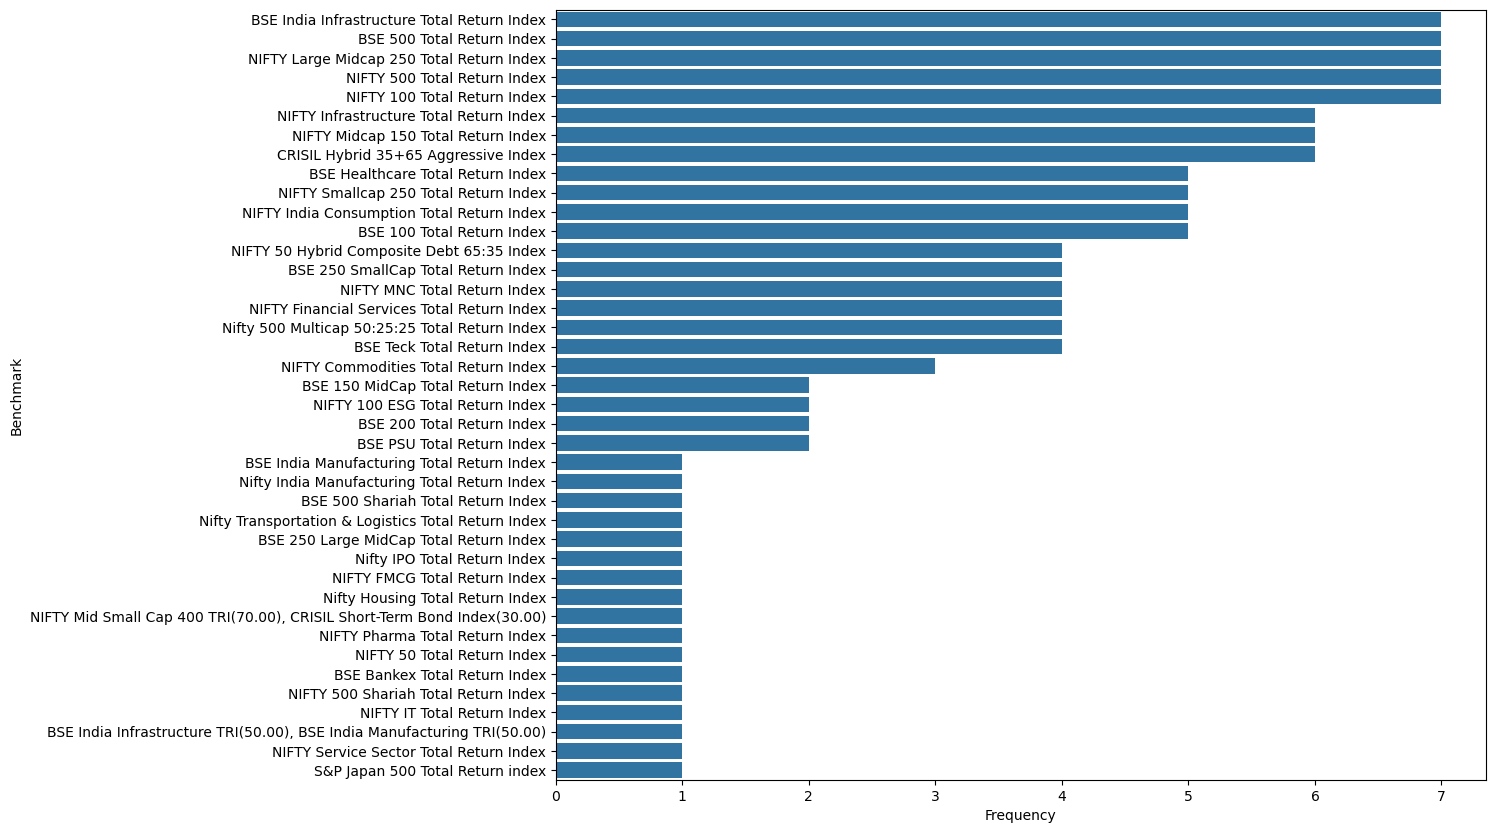

BSE India Infrastructure Total Return Index                                7
BSE 500 Total Return Index                                                 7
NIFTY Large Midcap 250 Total Return Index                                  7
NIFTY 500 Total Return Index                                               7
NIFTY 100 Total Return Index                                               7
NIFTY Infrastructure Total Return Index                                    6
NIFTY Midcap 150 Total Return Index                                        6
CRISIL Hybrid 35+65 Aggressive Index                                       6
BSE Healthcare Total Return Index                                          5
NIFTY Smallcap 250 Total Return Index                                      5
NIFTY India Consumption Total Return Index                                 5
BSE 100 Total Return Index                                                 5
NIFTY 50 Hybrid Composite Debt 65:35 Index                                 4

In [ ]:
# Exploratory analysis
plt.figure(figsize=(12,10))
sns.countplot(df.Benchmark,order=df.Benchmark.value_counts().sort_values(ascending=False).index)
plt.ylabel('Benchmark')
plt.xlabel('Frequency')
plt.show()

print(df.Benchmark.value_counts().sort_values(ascending=False))

**how many times each benchmark index appears in the dataset**.  

### **What This Means**  
- Each row in the dataset represents a mutual fund or a stock.  
- The **Benchmark column** tells us which index that fund/stock is being compared against.  
- `value_counts()` gives a **count of how many funds/stocks use each benchmark**.  

### **Observations from the Output**  
1. **BSE India Infrastructure Total Return Index appears 7 times** → This means **7 different funds** are using this index as their benchmark.  
2. **NIFTY 500 Total Return Index appears 7 times** → Again, **7 funds** are using this benchmark.  
3. **CRISIL Hybrid 35+65 Aggressive Index appears 6 times** → **6 funds** are using this index.  
4. **NIFTY Smallcap 250 Total Return Index appears 5 times** → **5 funds** are using this index.  
5. **Some benchmarks appear only once** → Example: **Nifty India Manufacturing Total Return Index (1)** means **only 1 fund** is using this as a benchmark.  

### **Why is This Useful?**  
- It helps us **identify the most commonly used benchmarks** in the dataset.  
- We can see which **indexes are popular** among mutual funds.  
- If a benchmark has **only 1 or 2 funds**, it may be a niche category with fewer comparisons.  
- If a benchmark has **many funds**, it is likely a broad market index like NIFTY 500 or BSE 500.  


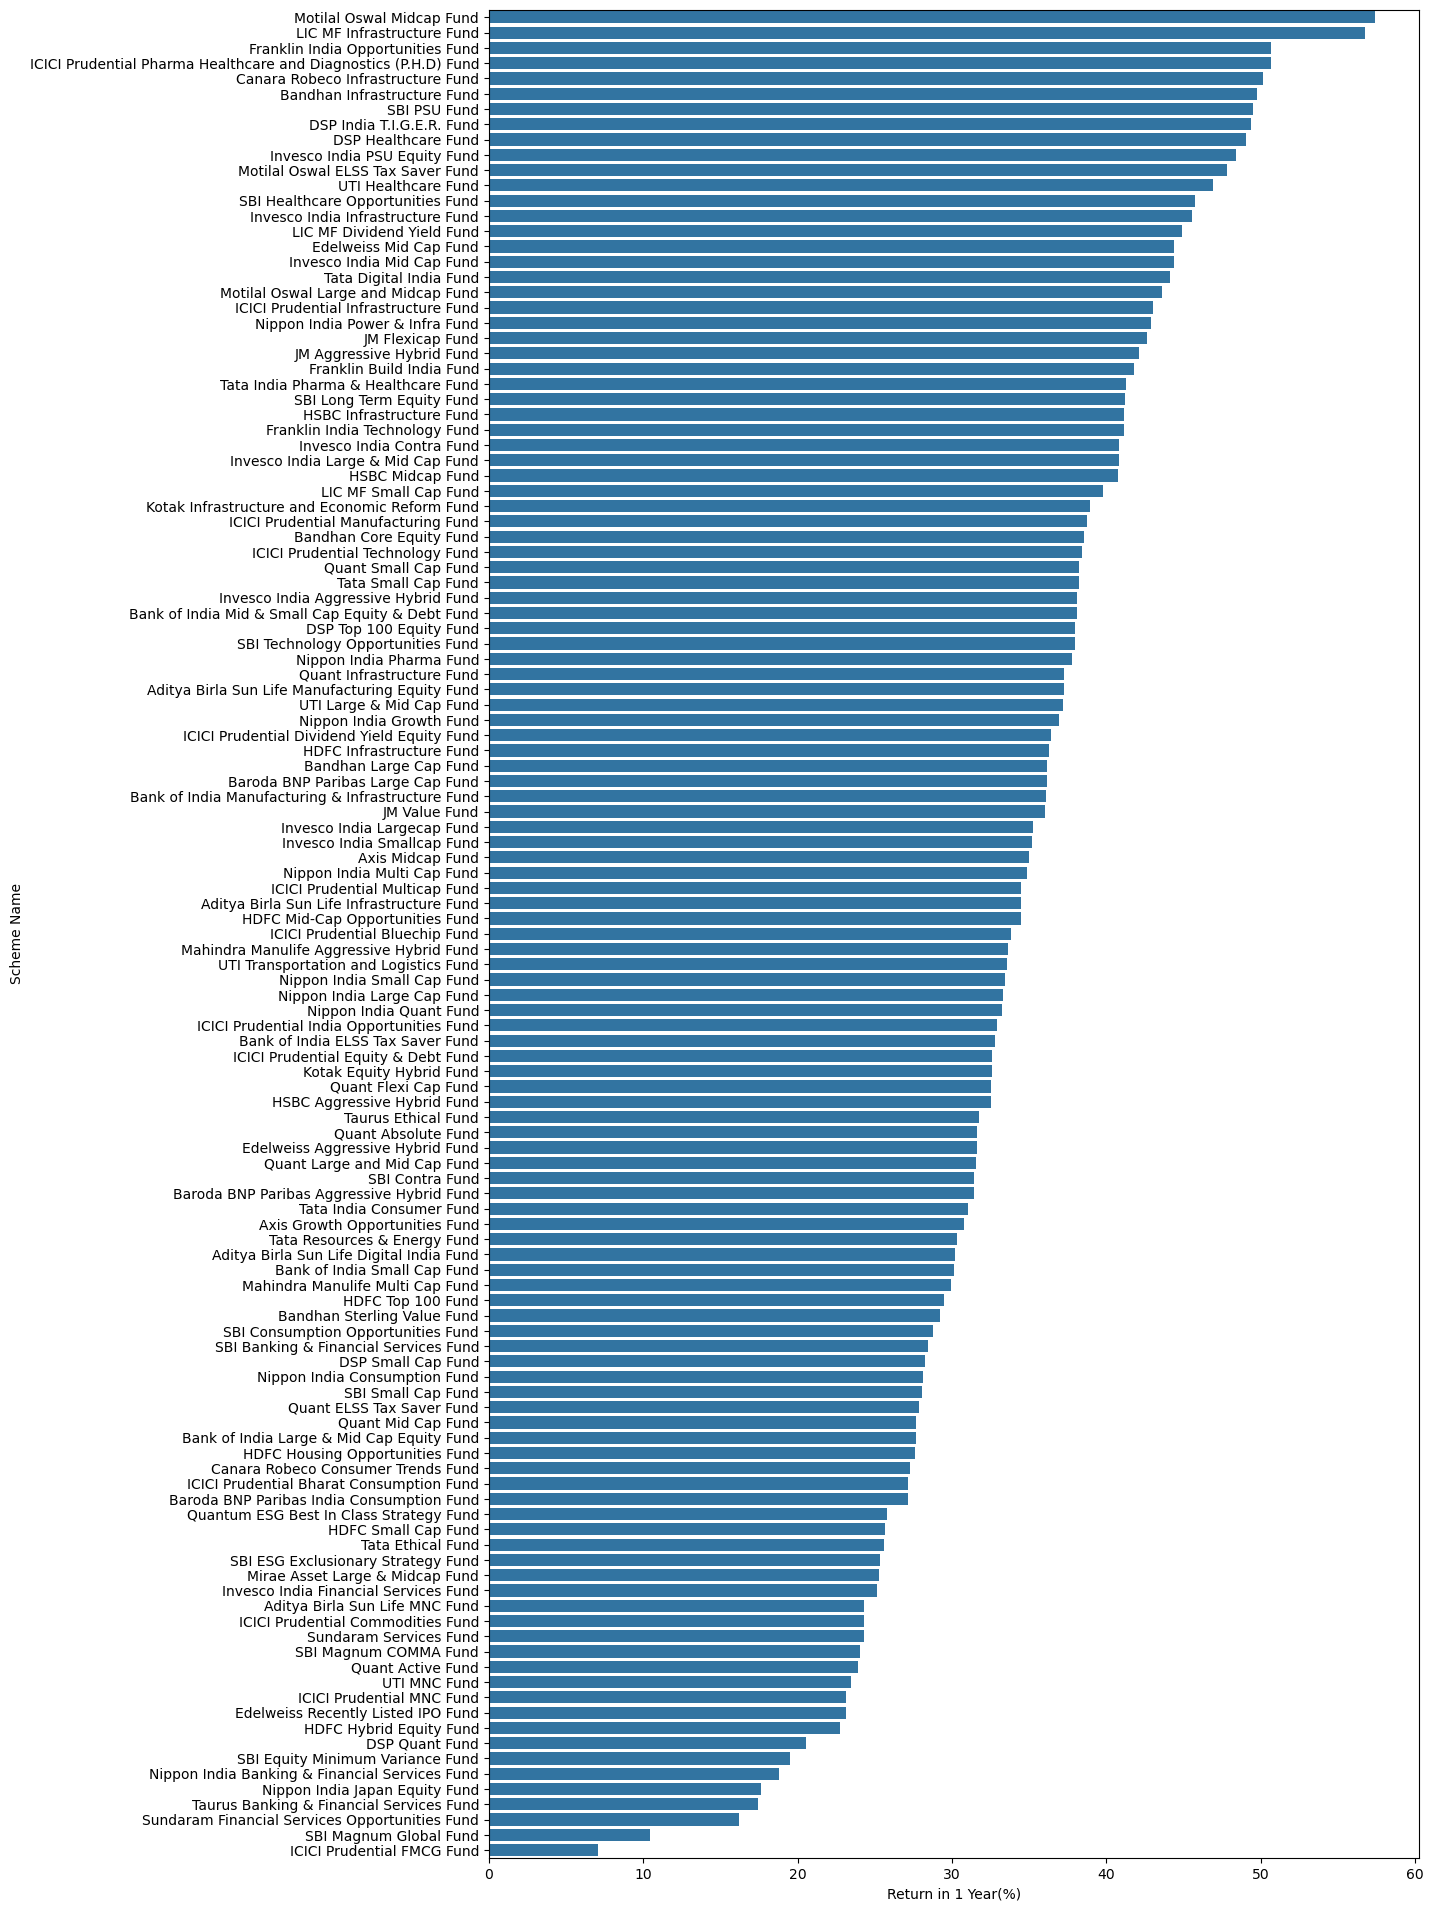

Scheme_Name
Motilal Oswal Midcap Fund                                          57.391104
LIC MF Infrastructure Fund                                         56.768751
Franklin India Opportunities Fund                                  50.689041
ICICI Prudential Pharma Healthcare and Diagnostics (P.H.D) Fund    50.646497
Canara Robeco Infrastructure Fund                                  50.133551
                                                                     ...    
Nippon India Japan Equity Fund                                     17.623449
Taurus Banking & Financial Services Fund                           17.409211
Sundaram Financial Services Opportunities Fund                     16.228637
SBI Magnum Global Fund                                             10.419927
ICICI Prudential FMCG Fund                                          7.096330
Name: Return_1_Year_(%)_Regular, Length: 121, dtype: float64


In [ ]:
# comparing which mutual fund gave best returns in 1 year

df.columns
plt.figure(figsize=(12,24))
sns.barplot(data=df,y='Scheme_Name',x='Return_1_Year_(%)_Regular',estimator=max,ci=False,
           order = df.sort_values("Return_1_Year_(%)_Regular", ascending=False)["Scheme_Name"])
plt.xlabel('Return in 1 Year(%)')
plt.ylabel('Scheme Name')
plt.show()
print(df.groupby('Scheme_Name')['Return_1_Year_(%)_Regular'].max().sort_values(ascending=False))
# df['Return_1_Year_(%)_Regular'].sort_values(ascending=False).index

The higher the value, the better the fund has performed over the past year.  

### **Key Insights:**  
- **Top Performer:** *Motilal Oswal Midcap Fund* with a **57.39% return** in 1 year.  
- **Other High Performers:** LIC MF Infrastructure Fund (**56.76%**), Franklin India Opportunities Fund (**50.69%**), ICICI Prudential Pharma Fund (**50.64%**), etc.  
- **Lowest Performers:**  
  - *SBI Magnum Global Fund* (**10.41%**)  
  - *ICICI Prudential FMCG Fund* (**7.09%**)  

This suggests that **midcap and infrastructure funds** have performed well, while **FMCG and financial sector funds** have given lower returns over the past year.  

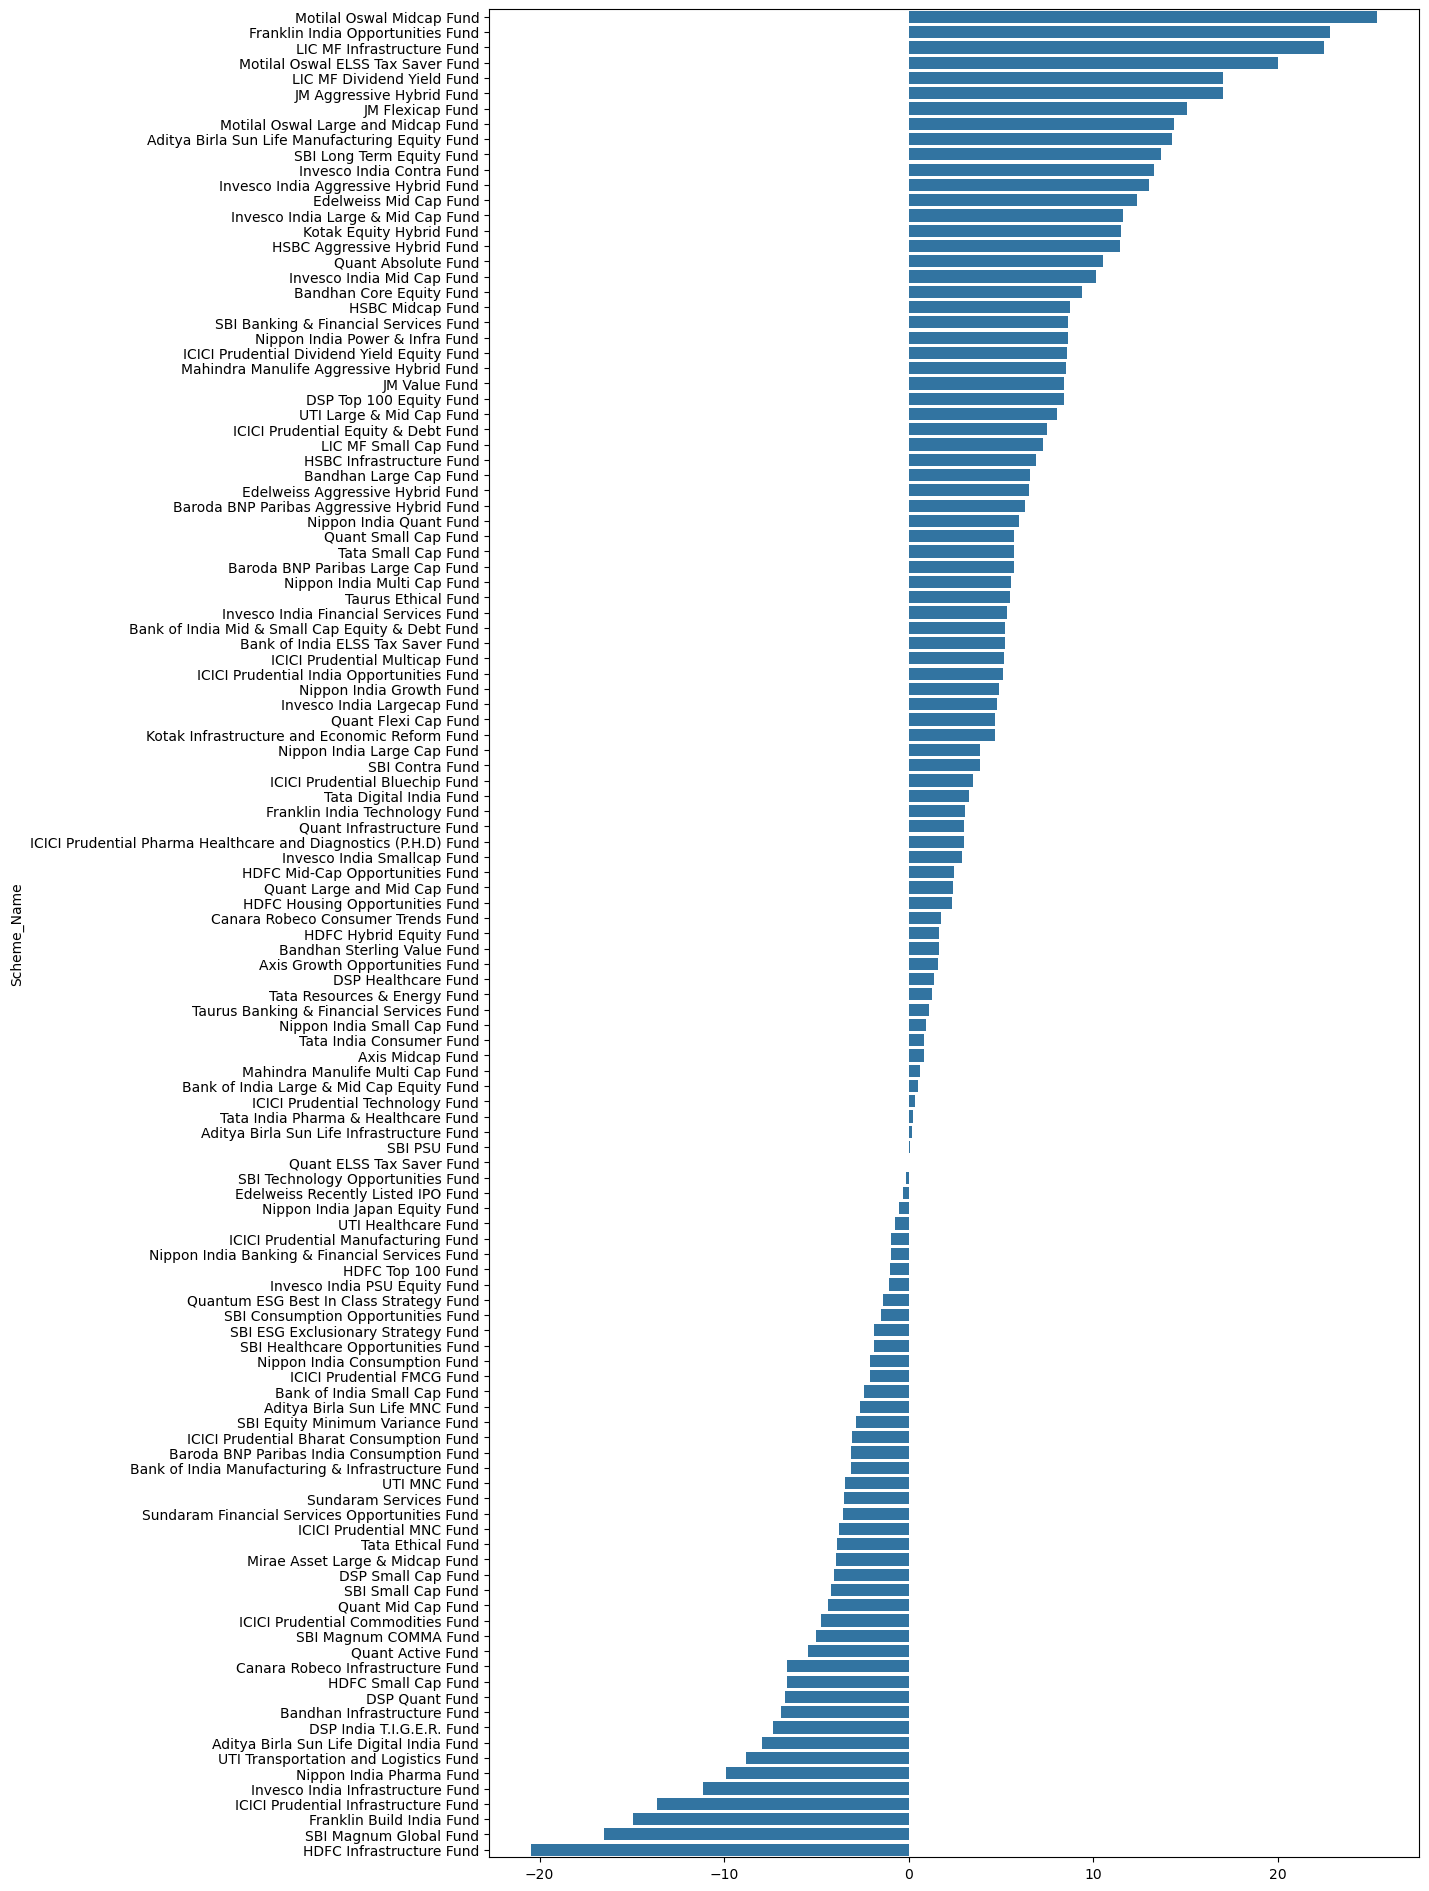

Scheme_Name
Motilal Oswal Midcap Fund               25.353232
Franklin India Opportunities Fund       22.843530
LIC MF Infrastructure Fund              22.491407
Motilal Oswal ELSS Tax Saver Fund       20.002795
LIC MF Dividend Yield Fund              17.044069
                                          ...    
Invesco India Infrastructure Fund      -11.173639
ICICI Prudential Infrastructure Fund   -13.655107
Franklin Build India Fund              -14.930995
SBI Magnum Global Fund                 -16.526073
HDFC Infrastructure Fund               -20.452466
Name: Diff_1year, Length: 121, dtype: float64

In [ ]:
# Checking which scheme out performed their benchmark
plt.figure(figsize=(12,24))
sns.barplot(x=df.groupby('Scheme_Name')['Diff_1year'].max().sort_values(ascending=False).values,
            y= df.groupby('Scheme_Name')['Diff_1year'].max().sort_values(ascending=False).index)
plt.show()
df.groupby('Scheme_Name')['Diff_1year'].max().sort_values(ascending=False)

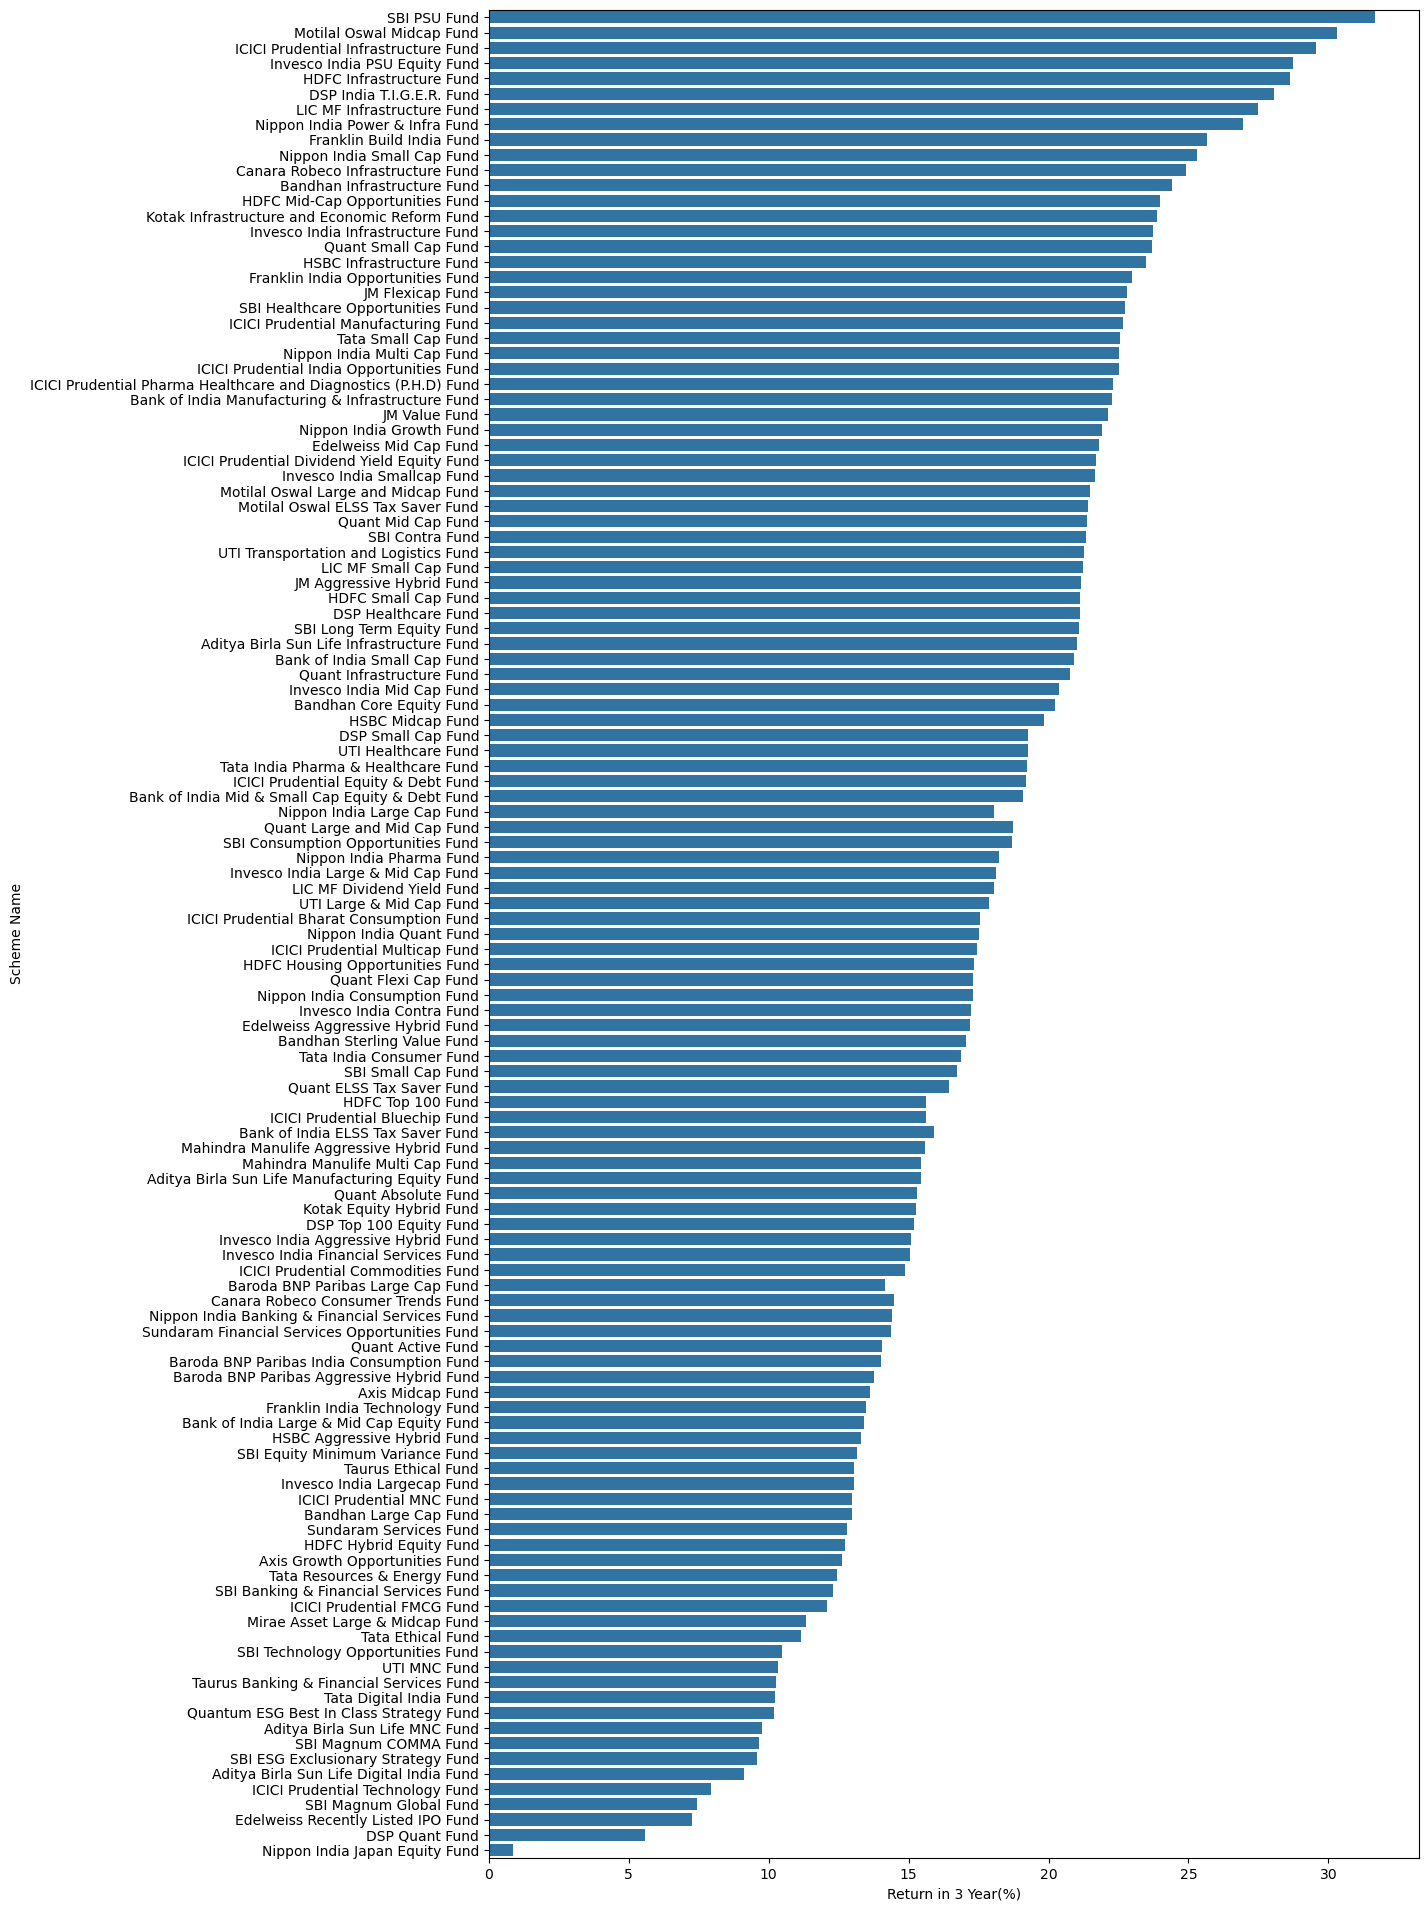

Scheme_Name
SBI PSU Fund                            31.651399
Motilal Oswal Midcap Fund               30.301033
ICICI Prudential Infrastructure Fund    29.552339
Invesco India PSU Equity Fund           28.725163
HDFC Infrastructure Fund                28.637867
                                          ...    
ICICI Prudential Technology Fund         7.940955
SBI Magnum Global Fund                   7.430309
Edelweiss Recently Listed IPO Fund       7.241386
DSP Quant Fund                           5.585167
Nippon India Japan Equity Fund           0.862657
Name: Return_3_Year_(%)_Regular, Length: 121, dtype: float64


In [ ]:
# 3 year analysis

df.columns
plt.figure(figsize=(12,24))
# print(df.sort_values("Return_3_Year_(%)_Regular", ascending=False)["Scheme_Name"])
sns.barplot(data=df, y='Scheme_Name', x = 'Return_3_Year_(%)_Regular'
            ,ci=False,order=df.sort_values("Return_3_Year_(%)_Regular", ascending=False)["Scheme_Name"])
plt.xlabel('Return in 3 Year(%)')
plt.ylabel('Scheme Name')
plt.show()
print(df.groupby('Scheme_Name')['Return_3_Year_(%)_Regular'].max().sort_values(ascending=False))

### **Top Performing Funds (High 3-Year Returns)**  
These funds have **outperformed**, indicating strong growth over the last 3 years:  
1. **SBI PSU Fund** → **31.65%**  
2. **Motilal Oswal Midcap Fund** → **30.30%**  
3. **ICICI Prudential Infrastructure Fund** → **29.55%**  
4. **Invesco India PSU Equity Fund** → **28.72%**  
5. **HDFC Infrastructure Fund** → **28.63%**  

**Why they performed well?**  
- **PSU funds** have likely benefited from government reforms and growth in public sector undertakings.  
- **Midcap & Infrastructure** funds have gained from economic recovery and infra-related spending.  

---

### **Lowest Performing Funds (Low 3-Year Returns)**  
These funds have **underperformed**, meaning they grew less than others:  
1. **ICICI Prudential Technology Fund** → **7.94%**  
2. **SBI Magnum Global Fund** → **7.43%**  
3. **Edelweiss Recently Listed IPO Fund** → **7.24%**  
4. **DSP Quant Fund** → **5.58%**  
5. **Nippon India Japan Equity Fund** → **0.86%**  

**Why they lagged?**  
- **Technology sector slowdown** – After a strong rally in 2020-21, tech stocks have faced corrections.  
- **IPO fund struggles** – Many newly listed companies have underperformed due to market volatility.  
- **Japan equity fund weakness** – May be impacted by global economic conditions and currency fluctuations.  

---

### **Key Takeaways**  
- **PSU & Infra funds** have been the biggest winners.  
- **Midcap fund performance remains strong** in long-term investments.  
- **Technology & IPO funds** have underperformed, requiring caution.  

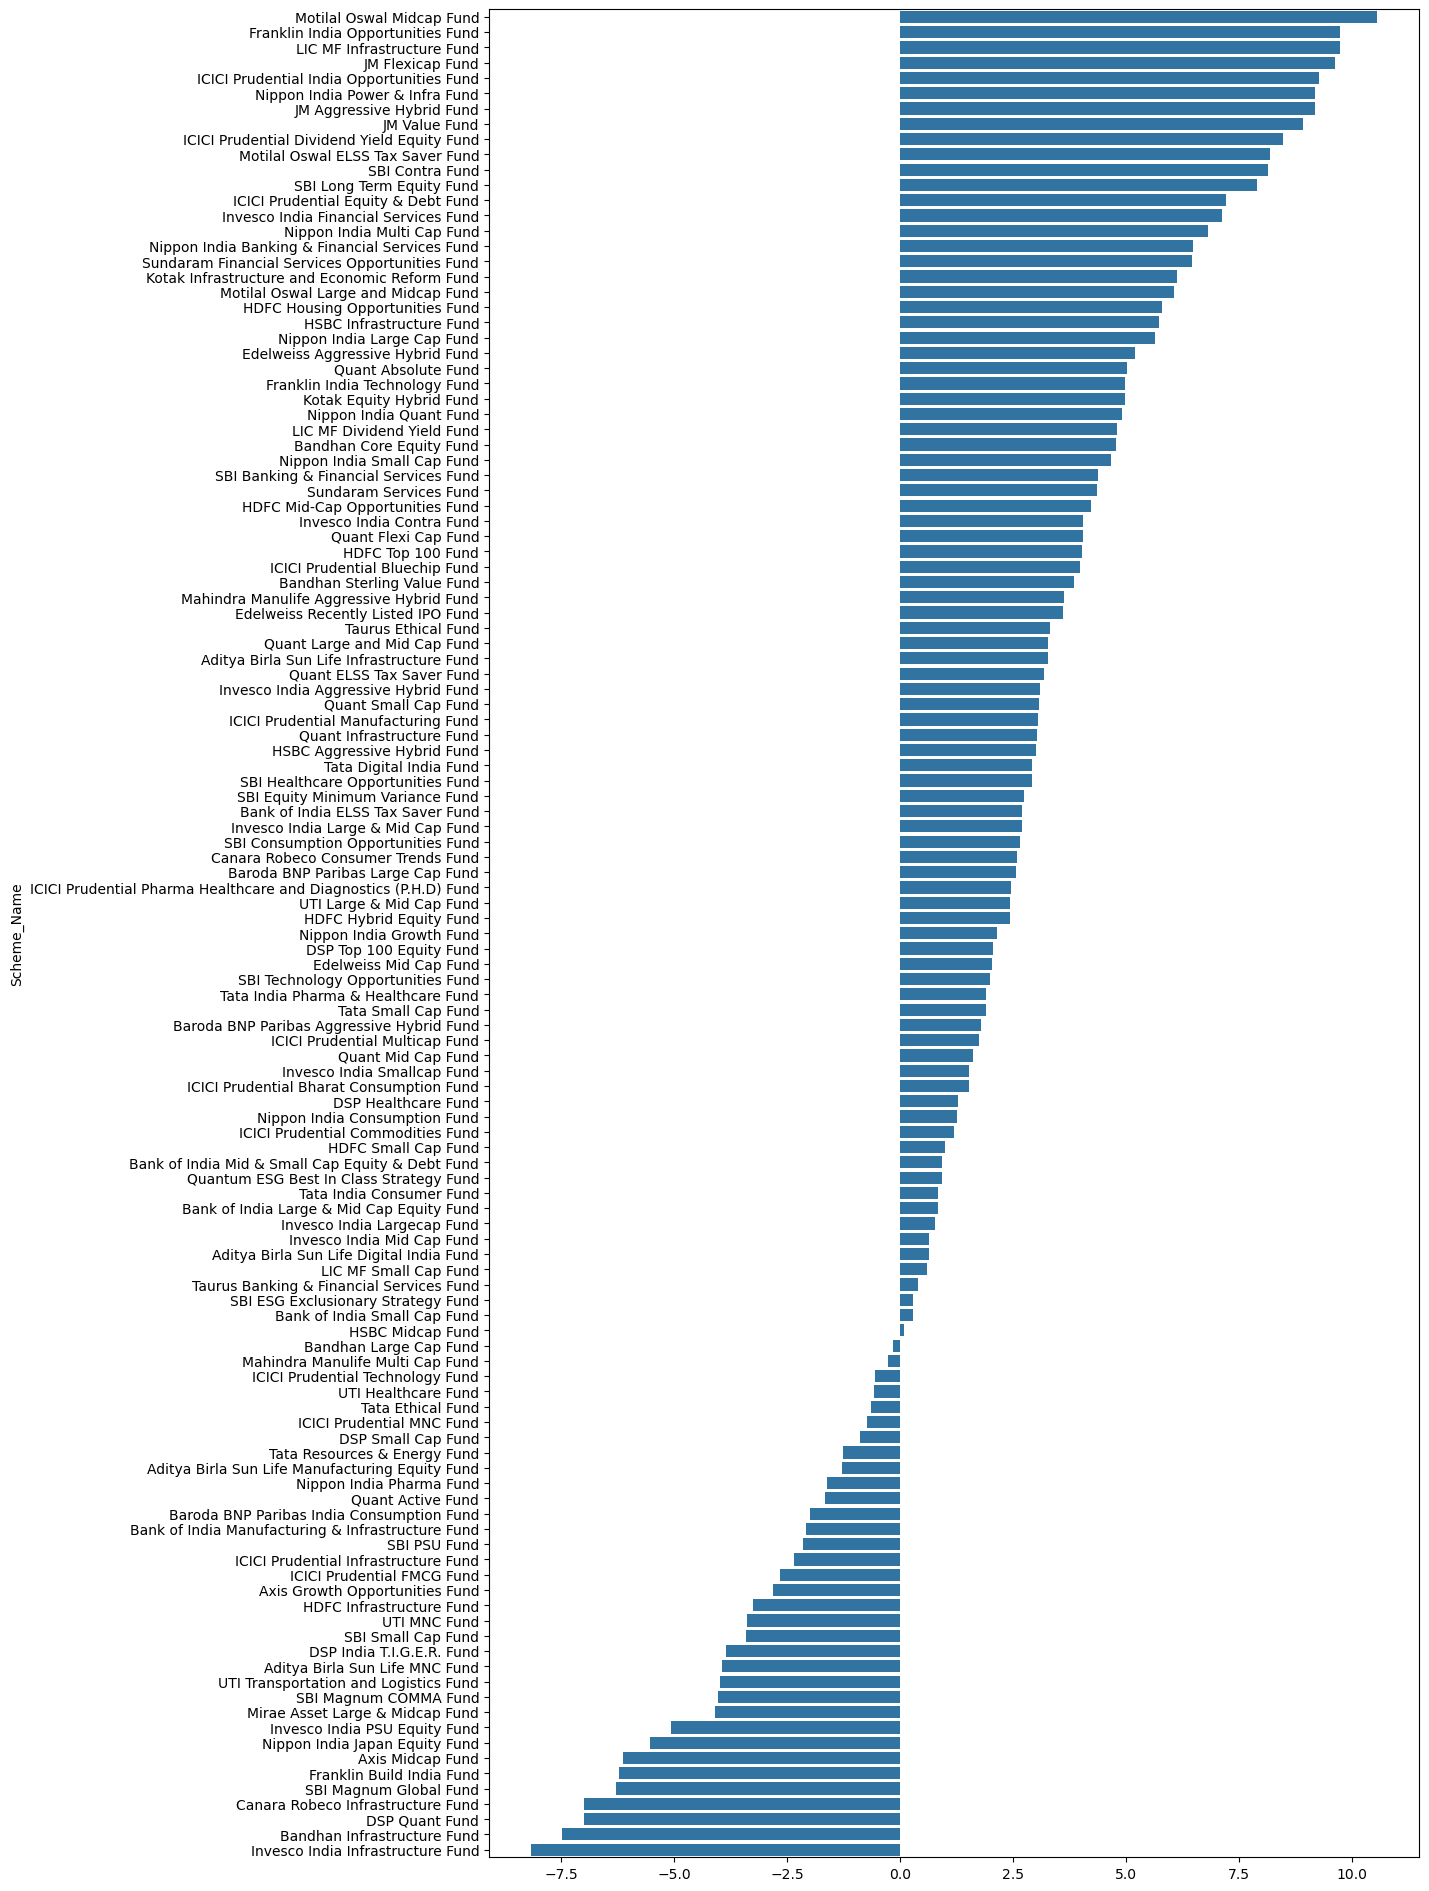

Scheme_Name
Motilal Oswal Midcap Fund                    10.541866
Franklin India Opportunities Fund             9.726806
LIC MF Infrastructure Fund                    9.726368
JM Flexicap Fund                              9.615108
ICICI Prudential India Opportunities Fund     9.258211
                                               ...    
SBI Magnum Global Fund                       -6.284748
Canara Robeco Infrastructure Fund            -6.991276
DSP Quant Fund                               -6.999648
Bandhan Infrastructure Fund                  -7.485875
Invesco India Infrastructure Fund            -8.164050
Name: Diff_3year, Length: 121, dtype: float64

In [ ]:
# Checking which scheme out performed their benchmark
plt.figure(figsize=(12,24))
sns.barplot(x=df.groupby('Scheme_Name')['Diff_3year'].max().sort_values(ascending=False).values,
            y= df.groupby('Scheme_Name')['Diff_3year'].max().sort_values(ascending=False).index)
plt.show()
df.groupby('Scheme_Name')['Diff_3year'].max().sort_values(ascending=False)

### **Funds That Outperformed Their Benchmarks**  
These funds **beat their benchmarks**, meaning they delivered better returns than expected based on market performance:  
1. **Motilal Oswal Midcap Fund** → **10.54%**  
2. **Franklin India Opportunities Fund** → **9.73%**  
3. **LIC MF Infrastructure Fund** → **9.72%**  
4. **JM Flexicap Fund** → **9.61%**  
5. **ICICI Prudential India Opportunities Fund** → **9.25%**  

**Why did they outperform?**  
- Strong stock selection within midcap, flexicap, and infrastructure sectors.  
- Economic recovery and government infrastructure spending.  
- Better portfolio management and sector allocation.  

---

### **Funds That Underperformed Their Benchmarks**  
These funds **failed to beat their benchmarks**, indicating weaker performance relative to market trends:  
1. **SBI Magnum Global Fund** → **-6.28%**  
2. **Canara Robeco Infrastructure Fund** → **-6.99%**  
3. **DSP Quant Fund** → **-7.00%**  
4. **Bandhan Infrastructure Fund** → **-7.49%**  
5. **Invesco India Infrastructure Fund** → **-8.16%**  

---

### **Key Insights**  
- **Midcap & Flexicap funds** performed **better than their benchmarks**, showing resilience.  
- **Infrastructure & Global funds** struggled, possibly due to market conditions.  
- **Benchmark comparison is crucial**—higher returns don't always mean better performance if the benchmark did even better.  

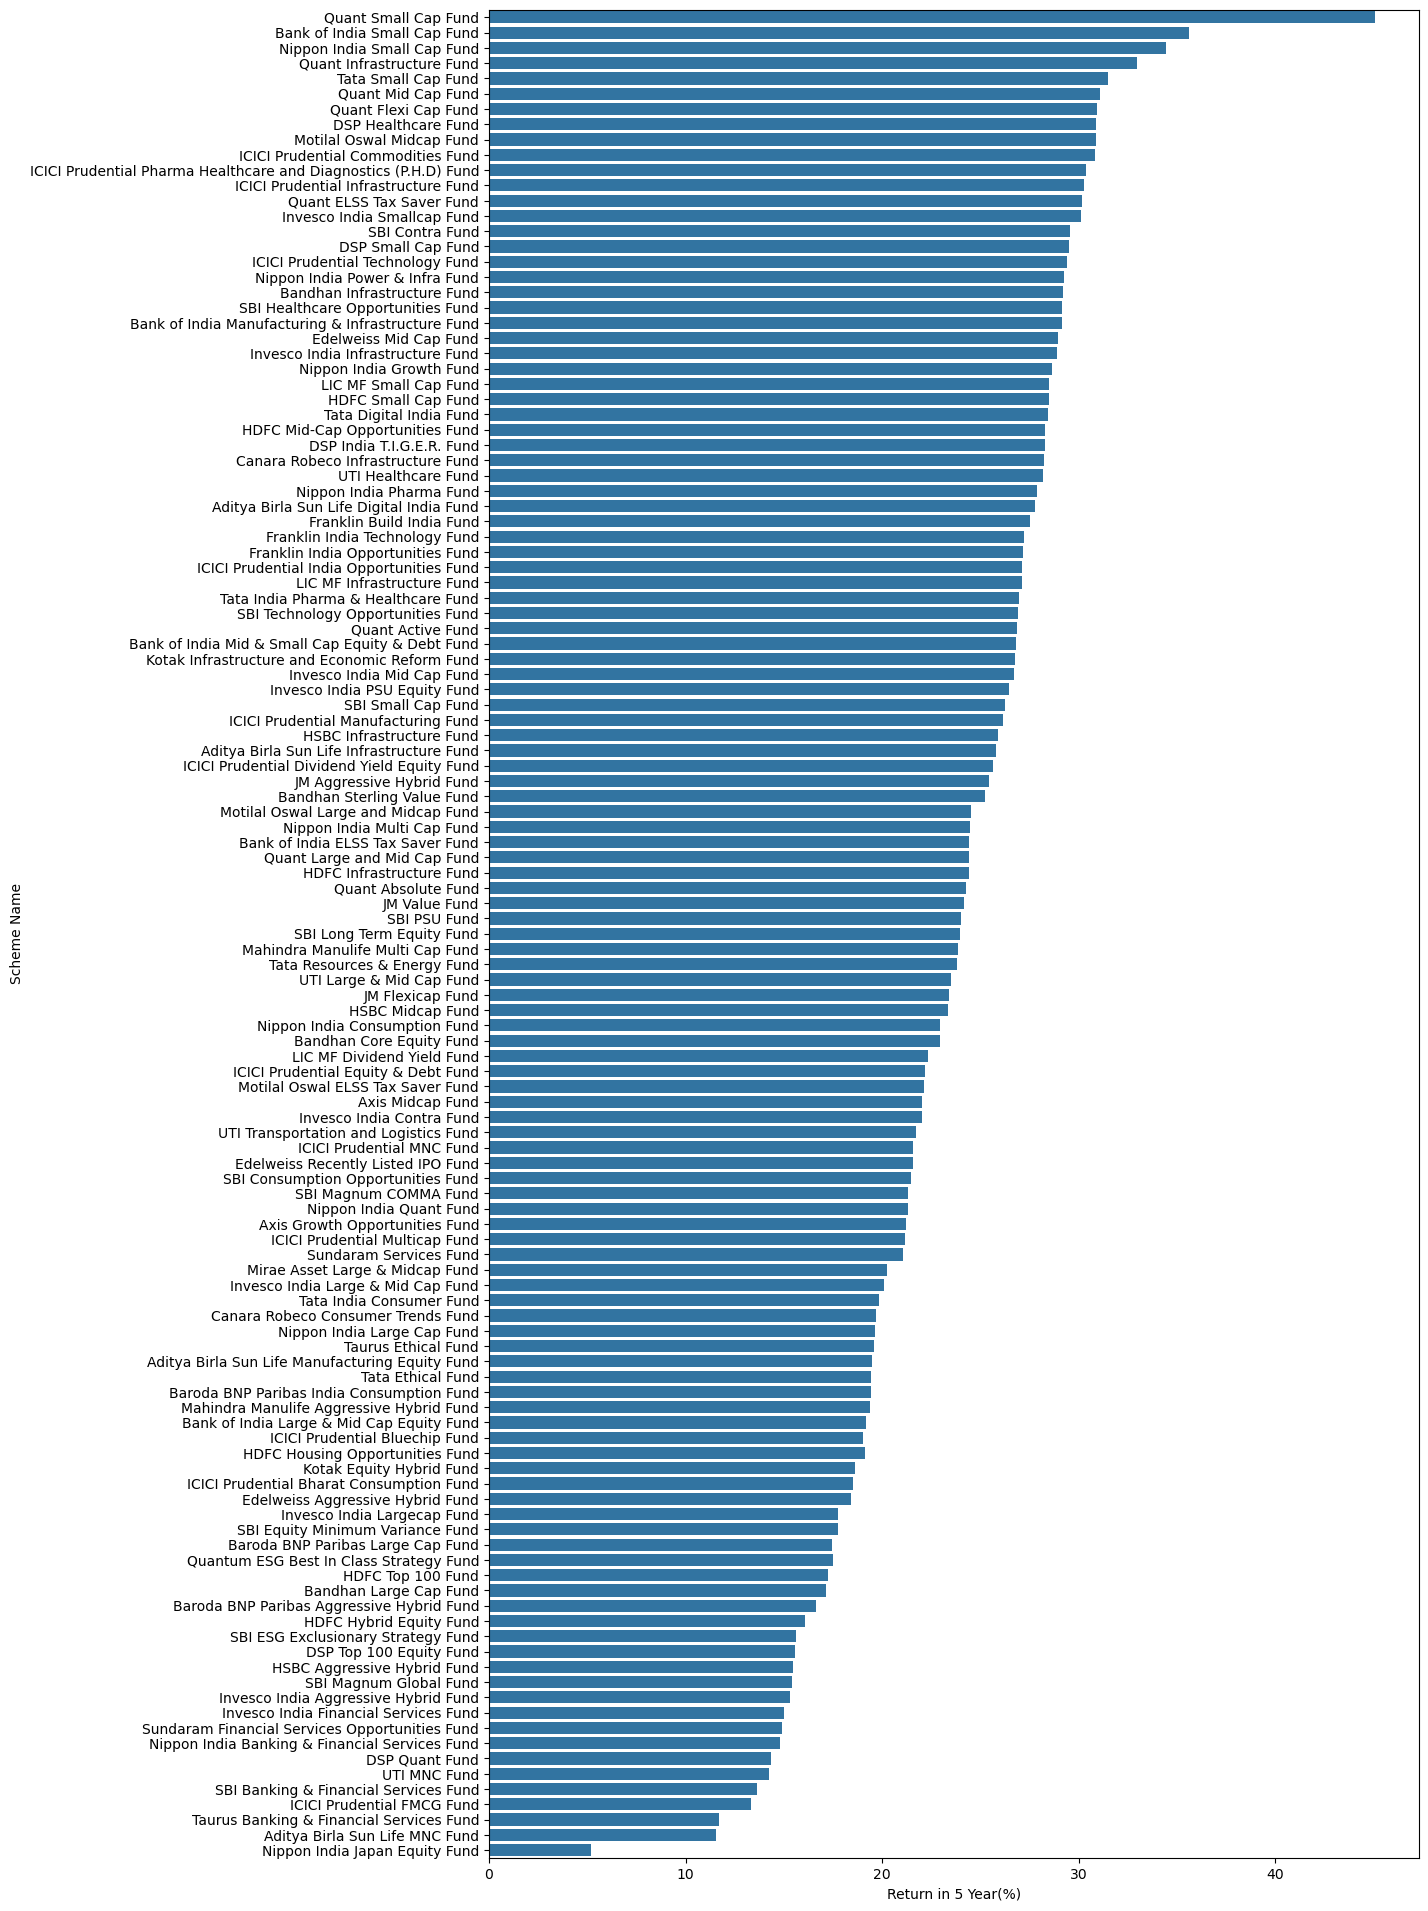

Scheme_Name
Quant Small Cap Fund                        45.048447
Bank of India Small Cap Fund                35.604508
Nippon India Small Cap Fund                 34.419810
Quant Infrastructure Fund                   32.943691
Tata Small Cap Fund                         31.485636
                                              ...    
SBI Banking & Financial Services Fund       13.642820
ICICI Prudential FMCG Fund                  13.355838
Taurus Banking & Financial Services Fund    11.704833
Aditya Birla Sun Life MNC Fund              11.565684
Nippon India Japan Equity Fund               5.194041
Name: Return_5_Year_(%)_Regular, Length: 121, dtype: float64


In [ ]:
# 5 year analysis

df.columns
plt.figure(figsize=(12,24))
# print(df.sort_values("Return_5_Year_(%)_Regular", ascending=False)["Scheme_Name"])
sns.barplot(data=df, y='Scheme_Name', x = 'Return_5_Year_(%)_Regular'
            ,ci=False,order=df.sort_values("Return_5_Year_(%)_Regular", ascending=False)["Scheme_Name"])
plt.xlabel('Return in 5 Year(%)')
plt.ylabel('Scheme Name')
plt.show()
print(df.groupby('Scheme_Name')['Return_5_Year_(%)_Regular'].max().sort_values(ascending=False))

### **Funds That Outperformed Their Benchmarks**  
These funds **delivered higher-than-benchmark returns**, indicating strong stock selection and favorable market conditions:  
1. **Quant Small Cap Fund** → **45.05%**  
2. **Bank of India Small Cap Fund** → **35.60%**  
3. **Nippon India Small Cap Fund** → **34.42%**  
4. **Quant Infrastructure Fund** → **32.94%**  
5. **Tata Small Cap Fund** → **31.49%**  

**Why did they outperform?**  
- Small-cap funds have benefited from India’s economic growth, strong earnings, and domestic participation in equity markets.  
- Infrastructure funds gained due to government spending and policy support.  
- Quant funds (which use data-driven models) adapted well to market trends.  

---

### **Funds That Underperformed Their Benchmarks**  
These funds **delivered lower-than-benchmark returns**, suggesting weaker performance:  
1. **SBI Banking & Financial Services Fund** → **13.64%**  
2. **ICICI Prudential FMCG Fund** → **13.36%**  
3. **Taurus Banking & Financial Services Fund** → **11.70%**  
4. **Aditya Birla Sun Life MNC Fund** → **11.57%**  
5. **Nippon India Japan Equity Fund** → **5.19%**  

**Why did they underperform?**  
- **Banking & financial funds** struggled due to interest rate fluctuations and economic cycles.  
- **FMCG funds** saw slower growth due to rising input costs and lower demand.  
- **Japan-focused funds** performed poorly, likely due to weaker foreign market conditions and currency fluctuations.  

---

### **Key Takeaways**  
- **Small-cap and infrastructure funds dominated** in the last 5 years, significantly beating benchmarks.  
- **Banking, FMCG, and Japan-focused funds lagged**, facing sector-specific challenges.  
- **Rolling returns analysis** can help see consistency—should we compare 3-year vs. 5-year trends?  

In [ ]:
# finding out best mutual funds that have give better bench marks in in each term

In [ ]:
year1 = df.groupby('Scheme_Name')['Return_1_Year_(%)_Regular'].max().sort_values().head().index
year3 = df.groupby('Scheme_Name')['Return_3_Year_(%)_Regular'].max().sort_values().head().index
year5 = df.groupby('Scheme_Name')['Return_5_Year_(%)_Regular'].max().sort_values().head().index

In [ ]:
list_all = []
for i in year1:
    list_all.append(i)
for i in year3:
    list_all.append(i)
for i in year5:
    list_all.append(i)

list_all
# to avoid duplicacy
list_all = list(set(list_all))

In [ ]:
list_all

['SBI Banking & Financial Services Fund',
 'Nippon India Japan Equity Fund',
 'Taurus Banking & Financial Services Fund',
 'ICICI Prudential FMCG Fund',
 'Edelweiss Recently Listed IPO Fund',
 'ICICI Prudential Technology Fund',
 'Aditya Birla Sun Life MNC Fund',
 'SBI Magnum Global Fund',
 'DSP Quant Fund',
 'Sundaram Financial Services Opportunities Fund']

It's noteworthy that midcap and infrastructure funds have shown varied performance. For instance, the Motilal Oswal Midcap Fund outperformed its benchmark by 25.35%, while the HDFC Infrastructure Fund underperformed by 20.45%. This suggests that while some funds in these sectors have excelled, others have lagged, highlighting the importance of careful selection and diversification in investment decisions.

When evaluating mutual fund performance, it's crucial to consider factors such as the fund's investment strategy, sector allocation, and the prevailing economic environment. Additionally, past performance does not guarantee future results, so investors should align their choices with their financial goals and risk tolerance.

It’s smarter to focus on schemes that have **outperformed their benchmarks** rather than just looking at the highest returns. Here’s why:  

### **Why Benchmark Outperformance Matters More?**  
1. **Relative Performance:**  
   - A scheme with high returns might just be benefiting from a bullish market. If the whole sector is booming, even an average fund may show high returns.  
   - But if a fund beats its benchmark, it means the fund manager’s strategy is adding value beyond just market trends.  

2. **Sustainability of Returns:**  
   - A fund that consistently outperforms its benchmark is more likely to maintain good performance in different market conditions.  
   - A fund with the highest returns today might not sustain them in the long run.  

3. **Risk-Adjusted Returns:**  
   - Just looking at high returns doesn’t show how much risk was taken. Some funds take excessive risks to achieve high short-term returns.  
   - Benchmark outperformance suggests that the fund is managing risk better while still delivering good returns.  

### **How to Use Both Metrics Together?**  
- **Ideal Approach:** Pick funds that have both **good returns** and **consistent outperformance against benchmarks** over multiple years.  
- **Avoid Chasing Absolute Returns:** A fund that gave **40% return** but only matched its benchmark is not necessarily better than one that gave **20% return** but outperformed its benchmark by **5%**.  

### **Practical Example from Your Data:**  
- **Motilal Oswal Midcap Fund** (+25.35%) – If it also outperformed the midcap index, it's a solid choice.  
- **HDFC Infrastructure Fund** (-20.45%) – If the infrastructure benchmark fell by only -5%, this fund underperformed badly, making it a risky choice.  

### **Final Verdict:**  
- **Prioritize funds that consistently beat their benchmarks** – they show strong fund management and adaptability.  
- **Combine this with return analysis** – among the outperformers, choose those with **strong absolute returns** and reasonable risk levels.  

In [ ]:
# on the basis of 1 year returns
tp_prfm = df[df.Scheme_Name.isin(df.groupby('Scheme_Name')['Diff_1year'].max().sort_values(ascending=False).head(20).index)]

In [ ]:
tp_prfm.columns
tp_prfm.drop(columns=['Return_Since_Launch_Regular', 'Return_Since_Launch_Benchmark',
       'Diff_incep_year'],inplace=True)

In [ ]:
tp_prfm.index = tp_prfm.Scheme_Name

In [ ]:
tp_prfm.columns

Index(['Scheme_Name', 'Benchmark', 'Return_1_Year_(%)_Regular',
       'Return_1_Year_(%)_Benchmark', 'Diff_1year',
       'Return_3_Year_(%)_Regular', 'Return_3_Year_(%)_Benchmark',
       'Diff_3year', 'Return_5_Year_(%)_Regular',
       'Return_5_Year_(%)_Benchmark', 'Diff_5year'],
      dtype='object')

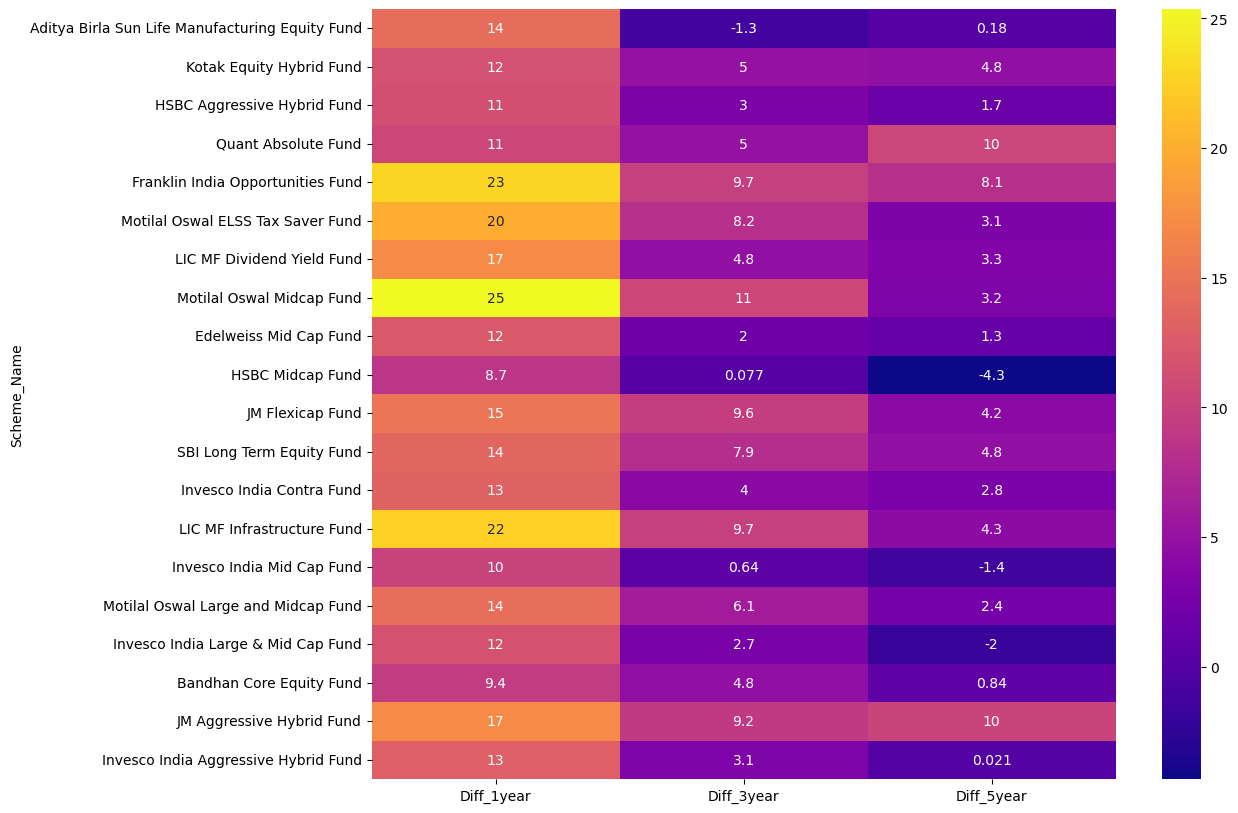

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(tp_prfm.drop(columns=['Return_1_Year_(%)_Regular',
       'Return_1_Year_(%)_Benchmark','Return_3_Year_(%)_Regular', 'Return_3_Year_(%)_Benchmark',
                                  'Return_5_Year_(%)_Regular',
       'Return_5_Year_(%)_Benchmark','Scheme_Name','Benchmark']),annot=True,cmap='plasma')
plt.show()

**Rolling returns** measure the **average returns of an investment over a fixed period, calculated continuously** at different intervals.  

### 🔹 How It Works:
- Instead of just checking returns over a single start and end date, rolling returns analyze **multiple overlapping periods** to smooth out fluctuations.  
- Example: If you calculate **1-year rolling returns** for the past 5 years:
  - You take returns from Jan 2020 - Jan 2021  
  - Then Feb 2020 - Feb 2021  
  - Then Mar 2020 - Mar 2021  
  - …and so on!  
- This helps understand **performance consistency** over different time frames.

### 🔹 Why Is It Important?  
- **Removes bias of specific start and end dates** (avoids misleading snapshots).  
- **Shows consistency** of a fund across different market cycles.  
- **Compares performance vs benchmarks** over time.  

### 🔹 Example of Rolling Returns Analysis:  
| Date Range | Fund A Return (%) | Fund B Return (%) | Benchmark (%) |
|------------|------------------|------------------|--------------|
| Jan 2020 - Jan 2021 | 12.5% | 10.2% | 11.0% |
| Feb 2020 - Feb 2021 | 13.1% | 9.8% | 10.5% |
| Mar 2020 - Mar 2021 | 14.0% | 11.0% | 12.2% |

- Fund A consistently outperforms the **benchmark** → **Good sign!**  
- Fund B lags behind the benchmark in multiple periods → **Red flag!**  


In [ ]:
# now using filtered best ones
list_all

['SBI Banking & Financial Services Fund',
 'Nippon India Japan Equity Fund',
 'Taurus Banking & Financial Services Fund',
 'ICICI Prudential FMCG Fund',
 'Edelweiss Recently Listed IPO Fund',
 'ICICI Prudential Technology Fund',
 'Aditya Birla Sun Life MNC Fund',
 'SBI Magnum Global Fund',
 'DSP Quant Fund',
 'Sundaram Financial Services Opportunities Fund']

In [ ]:
combined = df[df.Scheme_Name.isin(list_all)].drop(['Benchmark','Return_1_Year_(%)_Regular','Return_1_Year_(%)_Benchmark',
                                      'Return_3_Year_(%)_Regular', 'Return_3_Year_(%)_Benchmark',
                                       'Return_5_Year_(%)_Regular','Return_5_Year_(%)_Benchmark',
                                      'Return_Since_Launch_Regular', 'Return_Since_Launch_Benchmark','Diff_incep_year'],axis=1)
# df.columns

In [ ]:
combined.index = combined.Scheme_Name

<Axes: ylabel='Scheme_Name'>

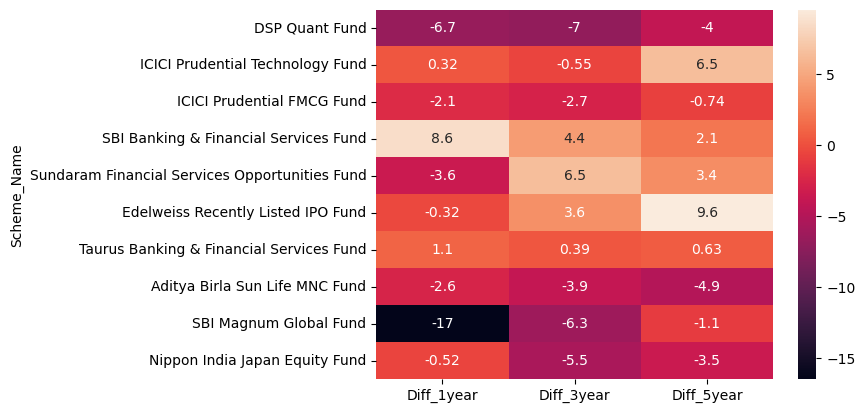

In [ ]:
sns.heatmap(combined.drop('Scheme_Name',axis=1),annot=True)

In [ ]:
# we can See that SBI Banking and Financial Services Fund is doing better
# and it is being consitent

In [ ]:
# Hi! Anshum Banga this side. A passionate data scientist.